In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

import sys
import pathlib

# in jupyter (lab / notebook), based on notebook path
module_path = str(pathlib.Path.cwd().parents[0] / "py")
# # in standard python
# module_path = str(pathlib.Path.cwd(__file__).parents[0] / "common")

if module_path not in sys.path:
    sys.path.append(module_path)

import common.viz

In [2]:
# Trace state variables, actions etc. 
# for a particular experiment instance
env_type = "sense"
env_name = "t24_random"

agent_type = "constant"
agent_name = "c40"

In [3]:
# Get seedlist
file = '../seedfile.dat'
with open(file) as f:
    seed_list = []
    for line in f: # read rest of lines
        seed_list.append([int(x) for x in line.split()][0])
        
# Specify seed
seed = seed_list[3]

In [4]:
root_folder = os.path.dirname(os.getcwd())

# load trace file
env_tag = env_type + '_' + env_name
agent_tag = agent_type + '_' + agent_name

# experiment tag
# name of folder to save models and results
experiment_type_tag = env_tag  + "-" + agent_tag
experiment_instance_tag =  experiment_type_tag + '-' + str(seed)

# Folder/file to load test results
test_results_folder = os.path.join(root_folder,"results", experiment_type_tag, "test")
assert os.path.exists(test_results_folder), "'" + test_results_folder + "' folder does not exist"
test_log_file = os.path.join(test_results_folder, experiment_instance_tag + '-test.npy')   

# Load data
experiment_instance_result = np.load(test_log_file,allow_pickle='TRUE').item()    

In [5]:
first_level_keys = list(experiment_instance_result["values"].keys())
second_level_keys = list(experiment_instance_result["values"][first_level_keys[0]].keys())
third_level_keys = list(experiment_instance_result["values"][first_level_keys[0]][second_level_keys[0]].keys())

print("Choose a location from:\t", first_level_keys)
print("Choose a year from:\t", second_level_keys)

Choose a location from:	 ['tokyo']
Choose a year from:	 [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [6]:
location = "tokyo"
year = 1996

In [7]:
timeslots_per_day = experiment_instance_result["params"]["env_params"]["timeslots_per_day"]

In [8]:
year_trace = experiment_instance_result["values"][location][year]

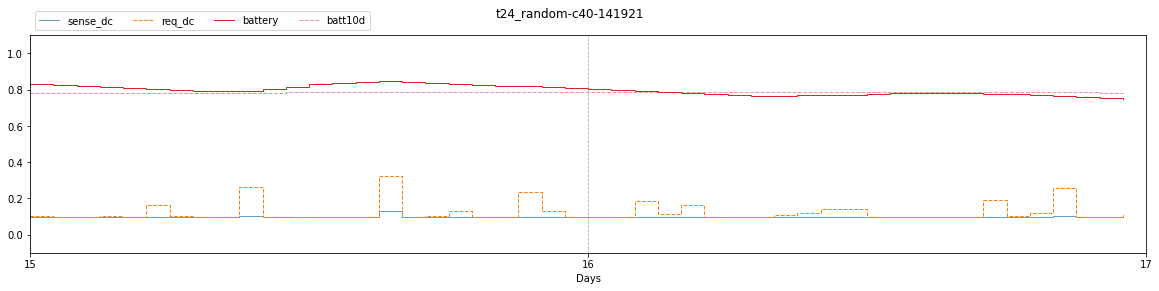

In [9]:
fig = common.viz.sorl_plot(year_trace,
                     timeslots_per_day,
                     START_DAY=15,
                     NO_OF_DAY_TO_PLOT=2,
                     show_reward=not True,
                     show_henergy=not True);
fig.suptitle(env_name+"-"+agent_name+"-"+str(seed));
fig